<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/DeepLearningFiles/Generative_adversial_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GANs:

GANs hvae mainly two types of network. generative neural network and discriminative neural network. generative network tries to generate real images from the latent vector space to fool the discriminative network that classifies the real and fake images.

It is called adversarial because both network tries to compete each other to improve each other's capabilities. generative network tries to minimize the probability of generated image as a fake so that eventually generated fake images become real images.

GANs have applications in generation of images, styles transfer, image to image generation, etc.

There are other variants of the GANs as well such as a CGAN, DCGAN, styleGAN and CycleGAN.



In [4]:
# import the libraries and modules required
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the most dataset
(X_train,_), (_,_) = mnist.load_data()

# normalize the reshape the data
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = np.expand_dims(X_train, axis=3)
X_train.shape

(60000, 28, 28, 1)

In [5]:
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("TensorFlow is installed as GPU version.")
else:
    print("TensorFlow is installed as CPU version.")

TensorFlow is installed as GPU version.


In [6]:
# gan param
latent_dim = 100

In [7]:
# implementation of the GAN using tensorflow and keras modules
# define the generator
def build_generator():
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(alpha=0.02),
      tf.keras.layers.Reshape((7,7,256)),
      tf.keras.layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(alpha=0.02),
      tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(alpha=0.02),
      tf.keras.layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh')
  ])
  return model

In [8]:
# define the discriminator
def discriminator():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[28,28,1]),
      tf.keras.layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
      tf.keras.layers.LeakyReLU(alpha=0.02),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Conv2D(256, (5,5), strides=(2,2), padding='same'),
      tf.keras.layers.LeakyReLU(alpha=0.02),
      tf.keras.layers.MaxPool2D(pool_size=(4,4)),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model

In [9]:
# model instanaces
generator = build_generator()
discriminator = discriminator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# complie the discriminitor
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,026,305 (3.92 MB)

 Trainable params: 1,026,305 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [12]:
# compile the generator (GAN)
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4))

In [13]:
gan.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 28, 28, 1)      │     2,330,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │     1,026,305 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,357,249 (12.81 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 1,051,777 (4.01 MB)

In [14]:
# define the training function
def train(epochs, batch_size, sample_interval):
  for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_images = X_train[idx]

    # generate random fake input for image generation
    noise = np.random.normal(0,1,(batch_size, latent_dim))
    fake_images = generator.predict(noise) # predict the fake images

    # train teh discriminitor
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size,1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size,1)))
    d_loss = np.add(d_loss_real,d_loss_fake)

    # train the generator
    g_loss = gan.train_on_batch(noise, np.ones((batch_size,1)))

    # print the progress
    print(f"Epoch {epoch +1}/{epochs} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}] [G loss: {g_loss}]")

    if (epoch +1) % sample_interval == 0:
      sample_images(epoch)


def sample_images(epoch):
  r,c = 5,5
  noise = np.random.normal(0,1,(r*c, latent_dim))
  gen_images = generator.predict(noise)

  # rescale the images
  gen_images = 0.5 * gen_images + 0.5

  fig, axs = plt.subplots(r,c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i,j].imshow(gen_images[cnt,:,:,0], cmap='gray')
      axs[i,j].axis('off')
      cnt += 1
  plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/2000 [D loss: 1.3200113773345947, acc.: 127.34375] [G loss: 0.6783868074417114]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 2/2000 [D loss: 1.3409664630889893, acc.: 100.390625] [G loss: 0.6735612154006958]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 3/2000 [D loss: 1.3406327962875366, acc.: 95.44271087646484] [G loss: 0.6663655638694763]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 4/2000 [D loss: 1.3425602912902832, acc.: 91.51785278320312] [G loss: 0.6595950126647949]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 5/2000 [D loss: 1.3428702354431152, acc.: 89.63542175292969] [G loss: 0.6536639928817749]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 6/2000 [D loss: 1.3437745571136475, acc.: 88.06226348876953] [G loss: 0.6483877301216125]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 7/2000 [D loss: 1.3442130088806152, acc.: 86.8003158569336] [G loss: 0.642495334148407]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 8/2000 [D loss: 1.3456430435180664, acc.: 85.56640625] [G loss: 0.6367932

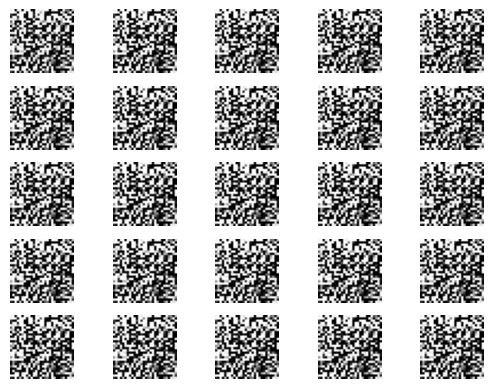

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 1001/2000 [D loss: 1.8334012031555176, acc.: 77.66051483154297] [G loss: 0.3334105610847473]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1002/2000 [D loss: 1.8336331844329834, acc.: 77.66253662109375] [G loss: 0.3333595097064972]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1003/2000 [D loss: 1.8338782787322998, acc.: 77.65364837646484] [G loss: 0.3333089053630829]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1004/2000 [D loss: 1.8341213464736938, acc.: 77.65333557128906] [G loss: 0.33326342701911926]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1005/2000 [D loss: 1.8343570232391357, acc.: 77.64991760253906] [G loss: 0.3332112729549408]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1006/2000 [D loss: 1.834593415260315, acc.: 77.65116882324219] [G loss: 0.3331562876701355]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 1007/2000 [D loss: 1.834842562675476, acc.: 77.64775848388672] [G loss: 0.3331088125705719]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoc

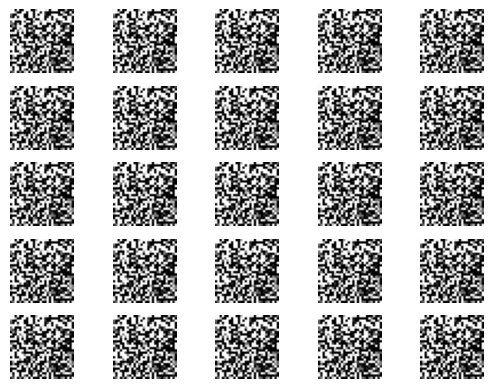

In [15]:
# train the GAN
epochs = 2000
batch_size = 128
sample_interval = 1000
train(epochs, batch_size, sample_interval)